In [1]:
#pip install pandas numpy statsmodels xlrd


In [2]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('Companions.xlsx')

# Display the first few rows of the dataset
print(df.head())


   PUB    REV  MAN  STA  TYP  INCOME   COM
0    1   4.32    2    8    1    10.0  0.10
1    2   9.69    6    7    1    12.0  0.68
2    3  12.56    7    5    1     9.0  0.79
3    4  16.54    9    6    1     8.3  0.68
4    5   9.41    3    7    1     7.9  0.96


In [3]:
# Display the data types of all columns
print(df.dtypes)

PUB         int64
REV       float64
MAN         int64
STA         int64
TYP         int64
INCOME    float64
COM       float64
dtype: object


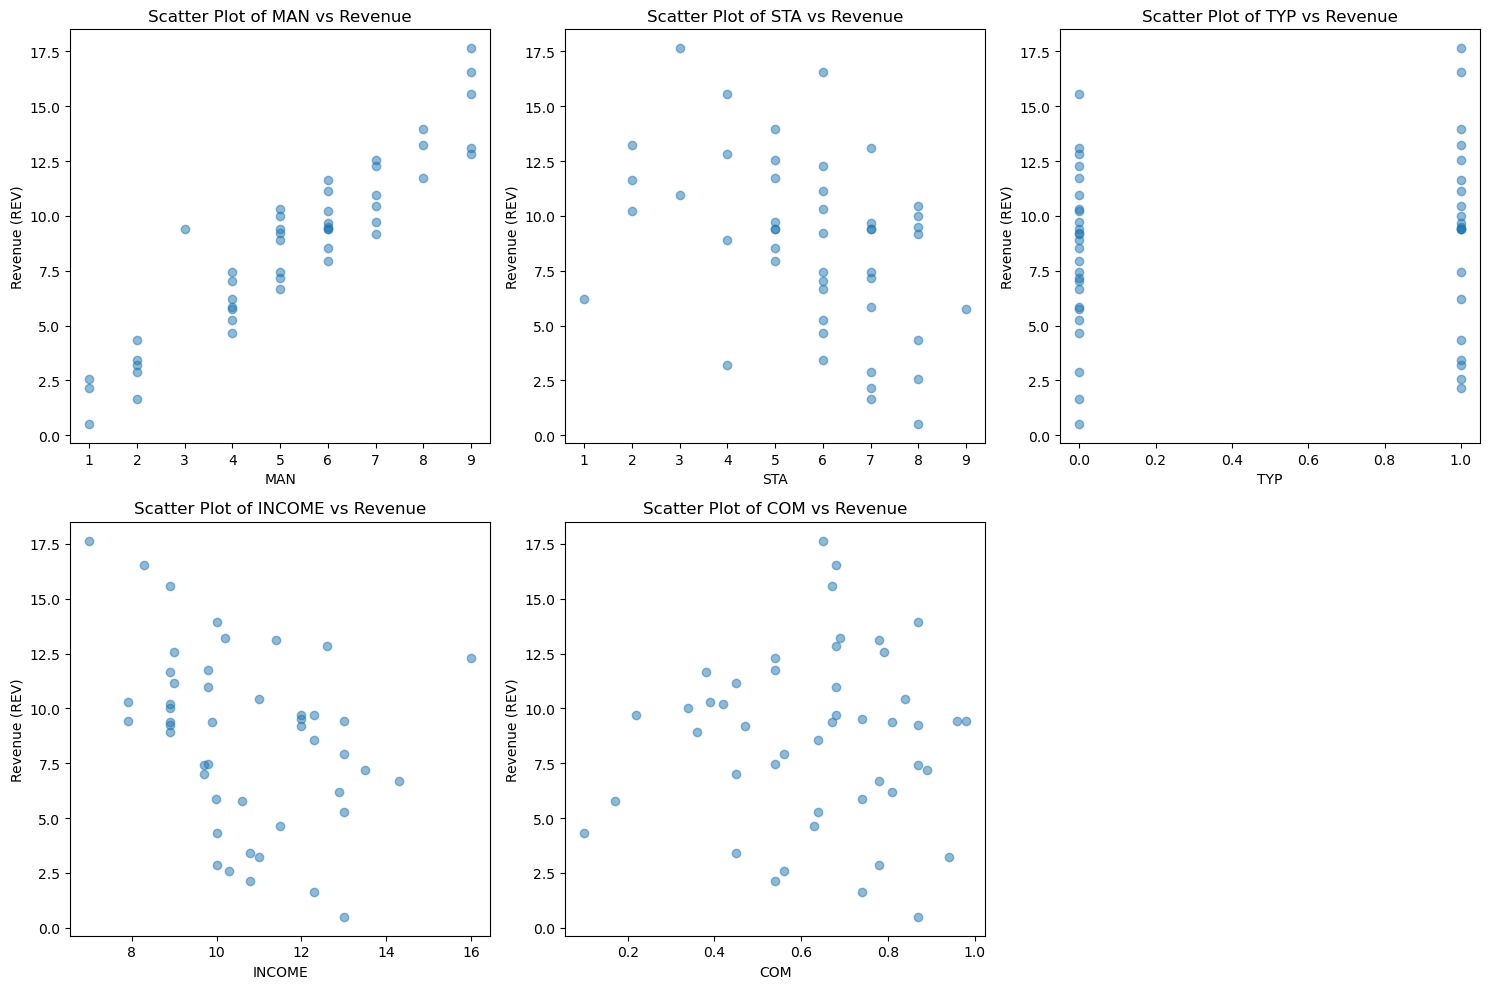

In [4]:
import matplotlib.pyplot as plt

# Define a list of predictor variables
predictor_vars = ['MAN', 'STA', 'TYP', 'INCOME', 'COM']

# Create scatter plots for each predictor variable vs 'REV'
plt.figure(figsize=(15, 10))
for i, var in enumerate(predictor_vars, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[var], df['REV'], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('Revenue (REV)')
    plt.title(f'Scatter Plot of {var} vs Revenue')

plt.tight_layout()
plt.show()


In [5]:
# Calculate the correlation matrix
correlation_matrix = df[['MAN', 'STA', 'TYP', 'INCOME', 'COM', 'REV']].corr()

# Print the correlation matrix
print(correlation_matrix)


             MAN       STA       TYP    INCOME       COM       REV
MAN     1.000000 -0.391449 -0.080618 -0.098316  0.053454  0.933402
STA    -0.391449  1.000000 -0.038127  0.135303 -0.060660 -0.408426
TYP    -0.080618 -0.038127  1.000000 -0.287721  0.066518  0.124112
INCOME -0.098316  0.135303 -0.287721  1.000000  0.170229 -0.339120
COM     0.053454 -0.060660  0.066518  0.170229  1.000000  0.021672
REV     0.933402 -0.408426  0.124112 -0.339120  0.021672  1.000000


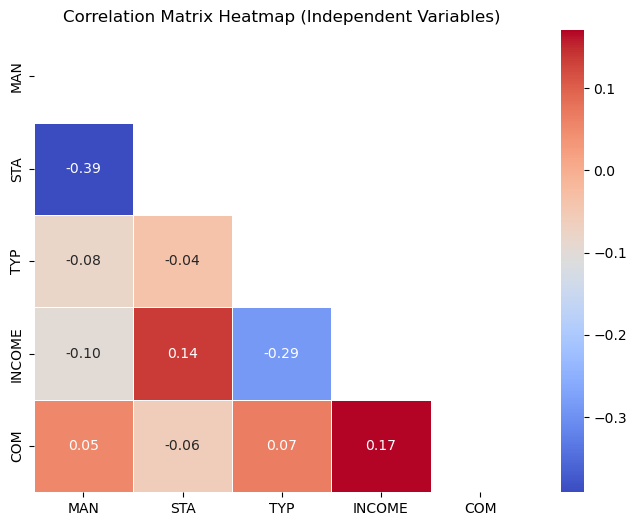

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the independent variables
independent_corr_matrix = df[['MAN', 'STA', 'TYP', 'INCOME', 'COM']].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(independent_corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix for the independent variables
sns.heatmap(independent_corr_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap (Independent Variables)')

# Show the plot
plt.show()


In [7]:
import statsmodels.api as sm

# Define the independent variables (predictors)
X = df[['MAN', 'STA', 'TYP', 'INCOME', 'COM']]

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable (target)
y = df['REV']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.16e-25
Time:                        13:19:15   Log-Likelihood:                -60.057
No. Observations:                  47   AIC:                             132.1
Df Residuals:                      41   BIC:                             143.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6350      1.134      4.089      0.0

In [8]:
import statsmodels.api as sm

# Define the independent variables (predictors)
X = df[['MAN', 'TYP', 'INCOME', 'STA']]

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable (target)
y = df['REV']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.65e-27
Time:                        13:19:15   Log-Likelihood:                -60.060
No. Observations:                  47   AIC:                             130.1
Df Residuals:                      42   BIC:                             139.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6189      1.095      4.218      0.0

In [9]:
import statsmodels.api as sm

# Define the independent variables (predictors) without 'STA' and 'COM'
X = df[['MAN', 'TYP', 'INCOME']]

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable (target)
y = df['REV']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the new regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     274.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.61e-28
Time:                        13:19:16   Log-Likelihood:                -60.159
No. Observations:                  47   AIC:                             128.3
Df Residuals:                      43   BIC:                             135.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3971      0.951      4.623      0.0

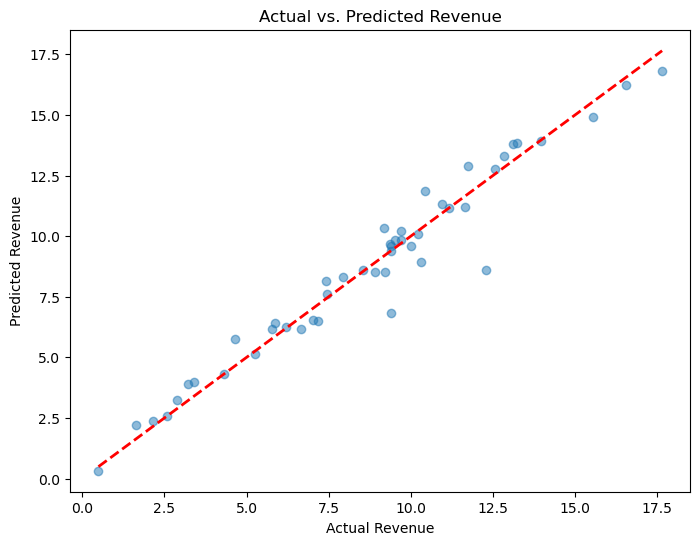

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data from the Excel file
df = pd.read_excel('Companions.xlsx')

# Define the independent variables (predictors) without 'STA' and 'COM'
X = df[['MAN', 'TYP', 'INCOME']]

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable (target)
y = df['REV']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the predicted values from the model
predicted_values = model.predict(X)

# Create a scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Plot the regression line
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2)

plt.show()


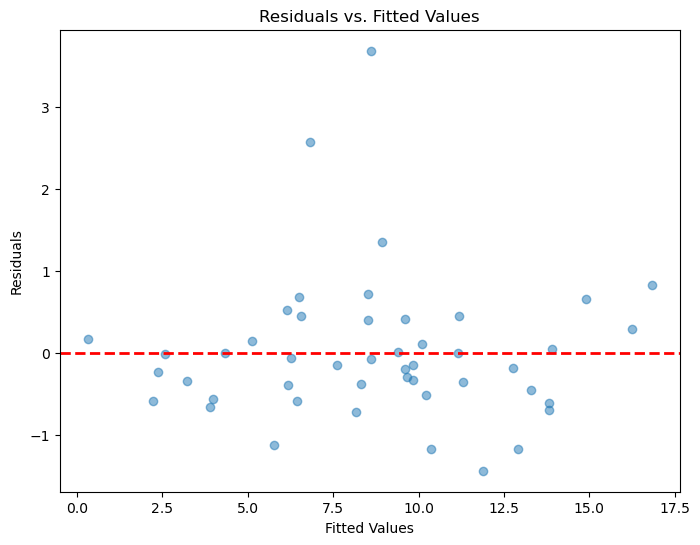

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data from the Excel file
df = pd.read_excel('Companions.xlsx')

# Define the independent variables (predictors) without 'STA' and 'COM'
X = df[['MAN', 'TYP', 'INCOME']]

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable (target)
y = df['REV']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the residuals from the model
residuals = model.resid

# Create a Residuals vs. Fitted Values plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs. Fitted Values')

plt.show()


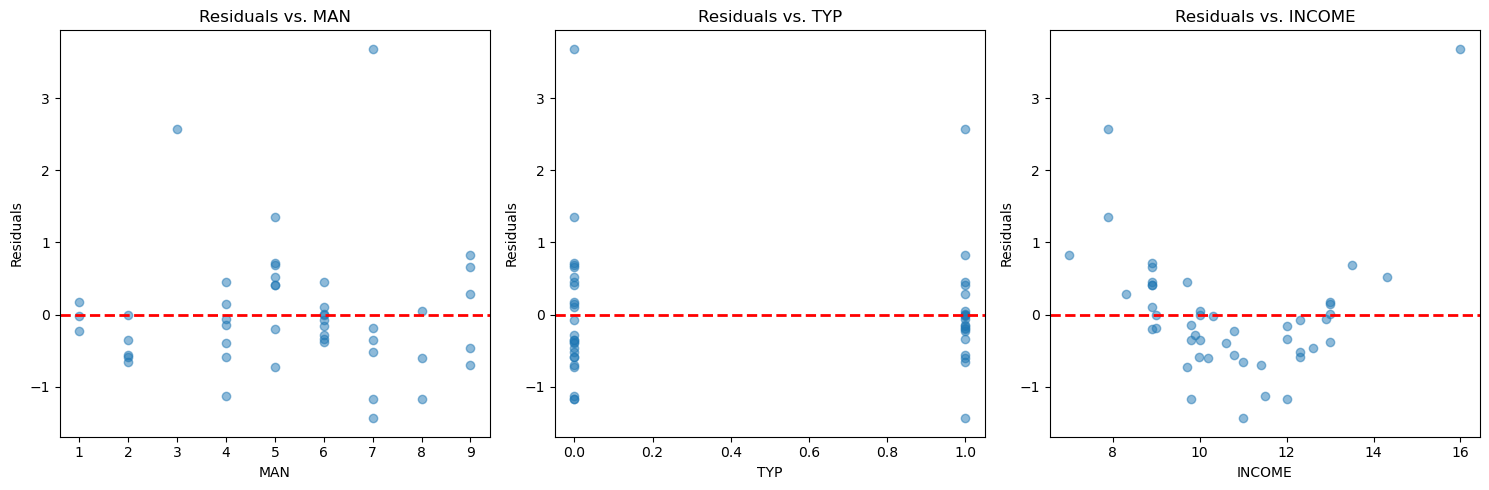

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data from the Excel file
df = pd.read_excel('Companions.xlsx')

# Define the independent variables (predictors) without 'STA' and 'COM'
X = df[['MAN', 'TYP', 'INCOME']]

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable (target)
y = df['REV']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the residuals from the model
residuals = model.resid

# Create separate Residuals vs. Predictor Variable plots for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'MAN' variable
axes[0].scatter(X['MAN'], residuals, alpha=0.5)
axes[0].set_xlabel('MAN')
axes[0].set_ylabel('Residuals')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Residuals vs. MAN')

# Plot for 'TYP' variable
axes[1].scatter(X['TYP'], residuals, alpha=0.5)
axes[1].set_xlabel('TYP')
axes[1].set_ylabel('Residuals')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residuals vs. TYP')

# Plot for 'INCOME' variable
axes[2].scatter(X['INCOME'], residuals, alpha=0.5)
axes[2].set_xlabel('INCOME')
axes[2].set_ylabel('Residuals')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[2].set_title('Residuals vs. INCOME')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [13]:
# Define the coefficients from the last regression model
const_coeff = 4.3971
man_coeff = 1.5989
typ_coeff = 1.0901
income_coeff = -0.4365

# Define the characteristics of Site A
site_a_values = {
    'const': 1,
    'MAN': 7,
    'TYP': 0,
    'INCOME': 8.0  # In £000s
}

# Define the characteristics of Site B
site_b_values = {
    'const': 1,
    'MAN': 6,
    'TYP': 1,
    'INCOME': 14.8  # In £000s
}

# Calculate the predicted revenues for Site A and Site B
predicted_rev_site_a = const_coeff * site_a_values['const'] + \
                        man_coeff * site_a_values['MAN'] + \
                        typ_coeff * site_a_values['TYP'] + \
                        income_coeff * site_a_values['INCOME']

predicted_rev_site_b = const_coeff * site_b_values['const'] + \
                        man_coeff * site_b_values['MAN'] + \
                        typ_coeff * site_b_values['TYP'] + \
                        income_coeff * site_b_values['INCOME']

print("Predicted revenue for Site A:", predicted_rev_site_a)
print("Predicted revenue for Site B:", predicted_rev_site_b)

# Compare the predicted revenues to make a recommendation
if predicted_rev_site_a > predicted_rev_site_b:
    print("Recommendation: Site A is recommended.")
elif predicted_rev_site_b > predicted_rev_site_a:
    print("Recommendation: Site B is recommended.")
else:
    print("Both sites are predicted to have the same revenue.")


Predicted revenue for Site A: 12.0974
Predicted revenue for Site B: 8.620399999999998
Recommendation: Site A is recommended.


Text(0.5, 1.0, 'Actual vs. Predicted Revenue')

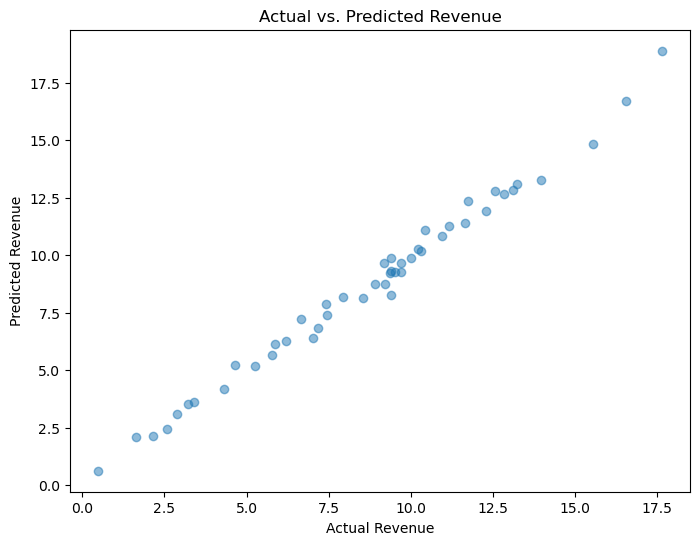

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('Companions.xlsx')

# Define the independent variables (predictors) without 'STA' and 'COM'
X = df[['MAN','TYP', 'INCOME']]

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Create a quadratic term for the 'INCOME' variable
X['INCOME_SQ'] = df['INCOME'] ** 2

# Define the dependent variable (target)
y = df['REV']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the predicted values from the model
predicted_values = model.predict(X)

# Create a scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

In [15]:
# Print the new regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     893.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.03e-40
Time:                        13:19:18   Log-Likelihood:                -26.053
No. Observations:                  47   AIC:                             62.11
Df Residuals:                      42   BIC:                             71.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.0577      1.906     13.668      0.0

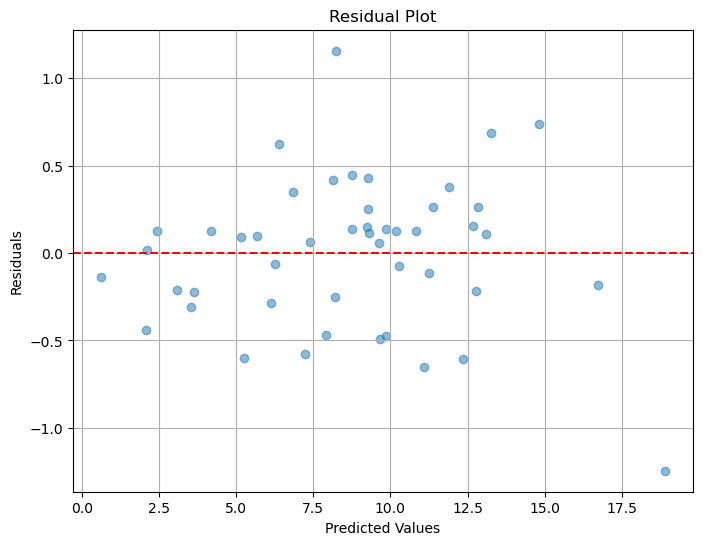

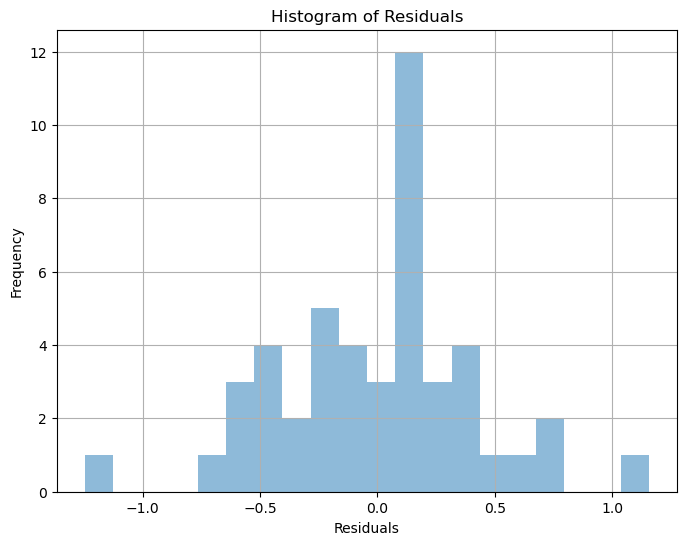

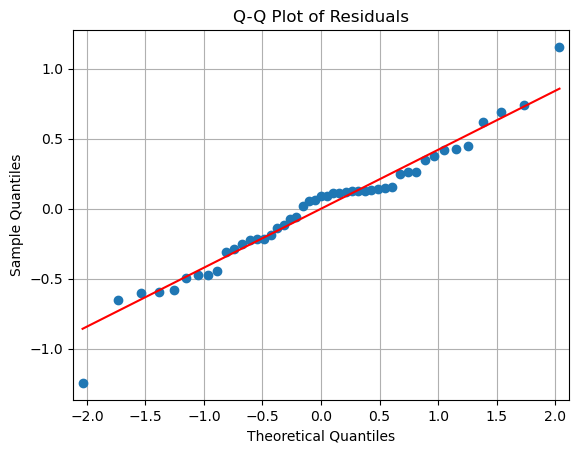

In [16]:
# Calculate the residuals
residuals = y - predicted_values

# Create a scatter plot of the residuals vs. the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

# Create a histogram of the residuals to check for normality
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

# Create a Q-Q plot to check for normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()


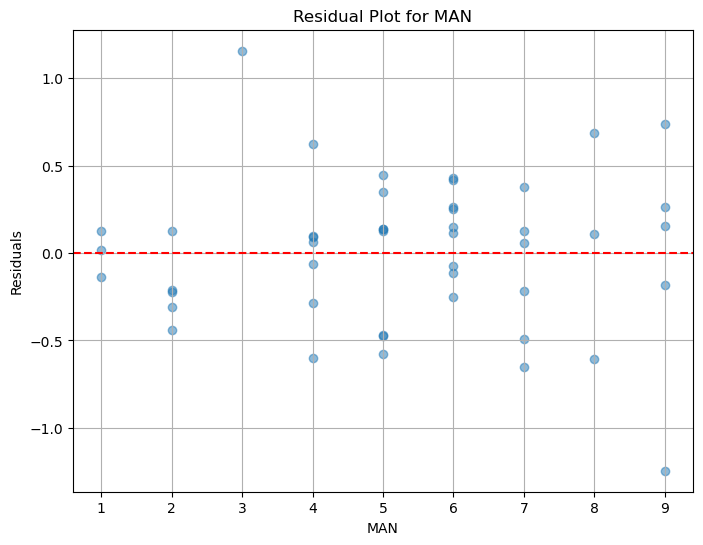

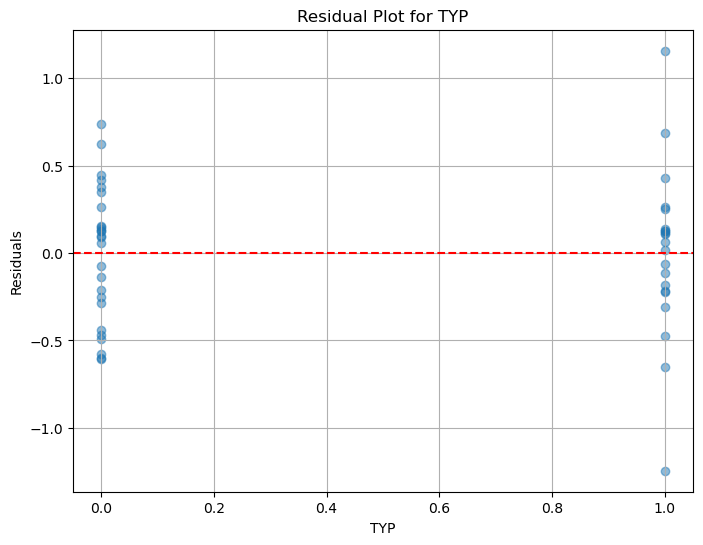

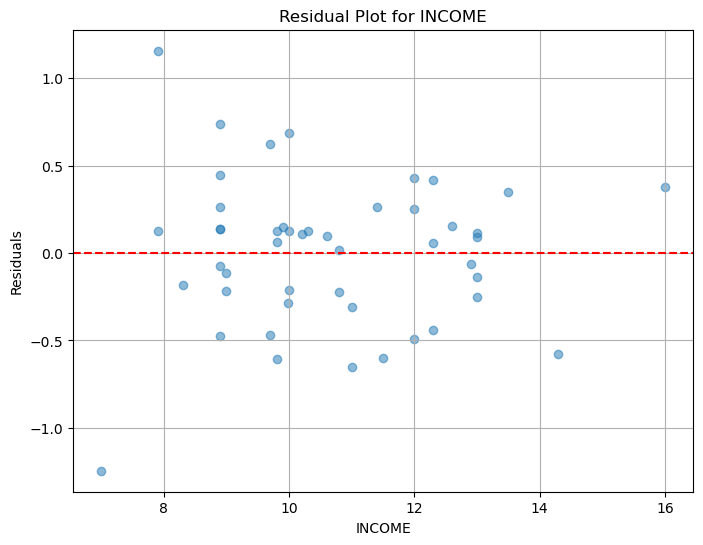

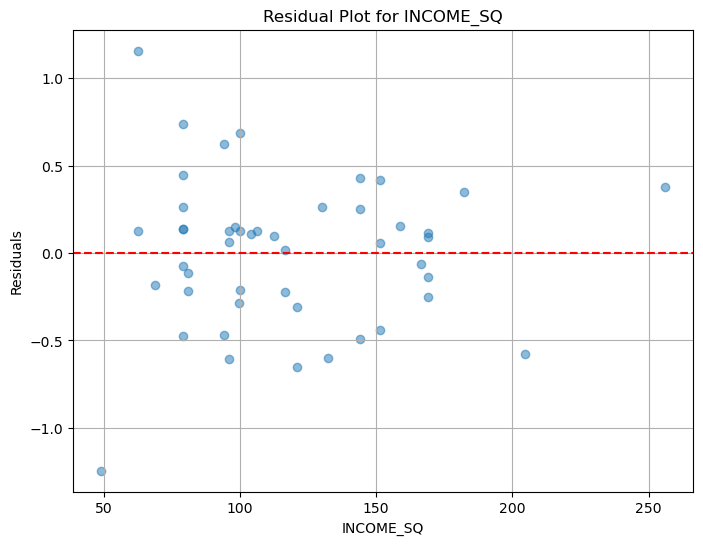

In [17]:
# Calculate the residuals
residuals = y - predicted_values

# Create a scatter plot of residuals vs. 'MAN' variable
plt.figure(figsize=(8, 6))
plt.scatter(X['MAN'], residuals, alpha=0.5)
plt.xlabel('MAN')
plt.ylabel('Residuals')
plt.title('Residual Plot for MAN')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

# Create a scatter plot of residuals vs. 'TYP' variable
plt.figure(figsize=(8, 6))
plt.scatter(X['TYP'], residuals, alpha=0.5)
plt.xlabel('TYP')
plt.ylabel('Residuals')
plt.title('Residual Plot for TYP')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

# Create a scatter plot of residuals vs. 'INCOME' variable
plt.figure(figsize=(8, 6))
plt.scatter(X['INCOME'], residuals, alpha=0.5)
plt.xlabel('INCOME')
plt.ylabel('Residuals')
plt.title('Residual Plot for INCOME')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

# Create a scatter plot of residuals vs. 'INCOME_SQ' variable
plt.figure(figsize=(8, 6))
plt.scatter(X['INCOME_SQ'], residuals, alpha=0.5)
plt.xlabel('INCOME_SQ')
plt.ylabel('Residuals')
plt.title('Residual Plot for INCOME_SQ')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('Companions.xlsx')

# Define the independent variables (predictors) without 'STA' and 'COM'
X = df[['MAN','TYP', 'INCOME']]

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Create a quadratic term for the 'INCOME' variable
X['INCOME_SQ'] = df['INCOME'] ** 2

# Define the dependent variable (target)
y = df['REV']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the predicted values from the model
predicted_values = model.predict(X)

# Calculate R-squared value
r_squared = model.rsquared

# Create a list to store the proportion of variance explained for each variable
proportion_variance_explained = []

# Iterate through the independent variables
for var in X.columns:
    if var != 'const':
        # Fit the model without the current variable
        model_without_var = sm.OLS(y, X.drop(var, axis=1)).fit()
        # Calculate the proportion of variance explained by excluding the variable
        proportion_explained = (model.rsquared_adj - model_without_var.rsquared_adj) / model.rsquared_adj
        proportion_variance_explained.append((var, proportion_explained))

# Print the R-squared value, the proportion of variance explained by each variable, and the percentage of variance explained
print(f'R-squared: {r_squared:.4f}')
print(f'Proportion of Variance Explained by Each Variable:')
for var, proportion in proportion_variance_explained:
    print(f'{var}: {proportion:.4f}')


R-squared: 0.9884
Proportion of Variance Explained by Each Variable:
MAN: 0.7604
TYP: 0.0190
INCOME: 0.0499
INCOME_SQ: 0.0408


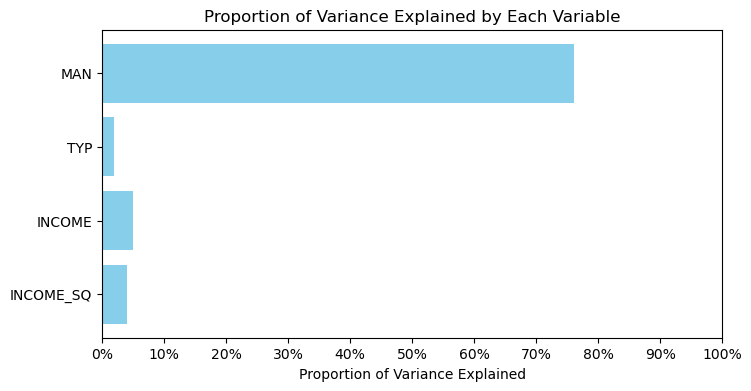

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('Companions.xlsx')

# Define the independent variables (predictors) without 'STA' and 'COM'
X = df[['MAN', 'TYP', 'INCOME']]

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Create a quadratic term for the 'INCOME' variable
X['INCOME_SQ'] = df['INCOME'] ** 2

# Define the dependent variable (target)
y = df['REV']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Calculate R-squared value
r_squared = model.rsquared

# Create a list to store the proportion of variance explained for each variable
proportion_variance_explained = []

# Iterate through the independent variables
for var in X.columns:
    if var != 'const':
        # Fit the model without the current variable
        model_without_var = sm.OLS(y, X.drop(var, axis=1)).fit()
        # Calculate the proportion of variance explained by excluding the variable
        proportion_explained = (model.rsquared_adj - model_without_var.rsquared_adj) / model.rsquared_adj
        proportion_variance_explained.append((var, proportion_explained))

# Extract variable names and proportions
variables, proportions = zip(*proportion_variance_explained)

# Create a smaller bar chart
plt.figure(figsize=(8, 4))  # Adjust the figure size here
plt.barh(variables, proportions, color='skyblue')
plt.xlabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Each Variable')
plt.gca().invert_yaxis()

# Customize x-axis ticks and labels to display percentages
plt.xticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

plt.show()


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Coefficients from your regression model
coefficients = {
    'const': 26.0577,
    'MAN': 1.5126,
    'TYP': 1.1021,
    'INCOME': -4.3543,
    'INCOME_SQ': 0.1755
}

# Site characteristics
site_a = {
    'Site': 'A',
    'MAN': 4,
    'TYP': 0,  # Conventional type
    'INCOME': 8,
    'INCOME_SQ': 8**2
}

site_b = {
    'Site': 'B',
    'MAN': 1,
    'TYP': 1,  # Modern or unusual theme/ambience
    'INCOME': 14.8,
    'INCOME_SQ': 14.8**2
}



Table:
  Site  Predicted Revenue
0    A            8.50570
1    B            2.67028


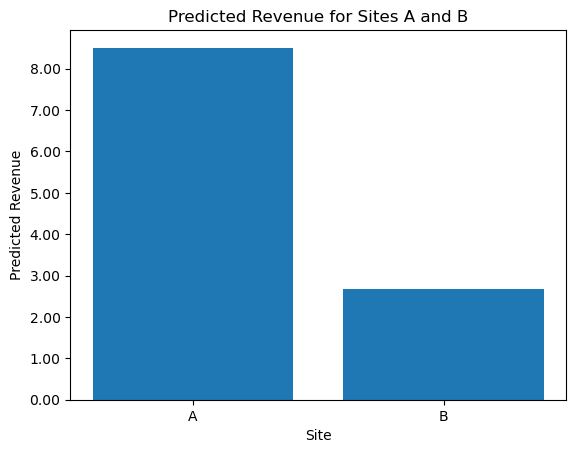

In [59]:
# Calculate Predicted Revenue for Sites A and B
predicted_revenue_a = (
    coefficients['const'] +
    coefficients['MAN'] * site_a['MAN'] +
    coefficients['TYP'] * site_a['TYP'] +
    coefficients['INCOME'] * site_a['INCOME'] +
    coefficients['INCOME_SQ'] * site_a['INCOME_SQ']
)

predicted_revenue_b = (
    coefficients['const'] +
    coefficients['MAN'] * site_b['MAN'] +
    coefficients['TYP'] * site_b['TYP'] +
    coefficients['INCOME'] * site_b['INCOME'] +
    coefficients['INCOME_SQ'] * site_b['INCOME_SQ']
)

# Create a DataFrame for the results
data = {
    'Site': [site_a['Site'], site_b['Site']],
    'Predicted Revenue': [predicted_revenue_a, predicted_revenue_b]
}

result_df = pd.DataFrame(data)

# Print the table with non-rounded numbers
print("Table:")
print(result_df)

# Plot Predicted Revenue without rounding on the y-axis
plt.bar(result_df['Site'], result_df['Predicted Revenue'])
plt.xlabel('Site')
plt.ylabel('Predicted Revenue')
plt.title('Predicted Revenue for Sites A and B')

# Display non-rounded numbers on the y-axis
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()


Table:
  Site  Predicted Revenue
0    A            8.50570
1    B            2.67028


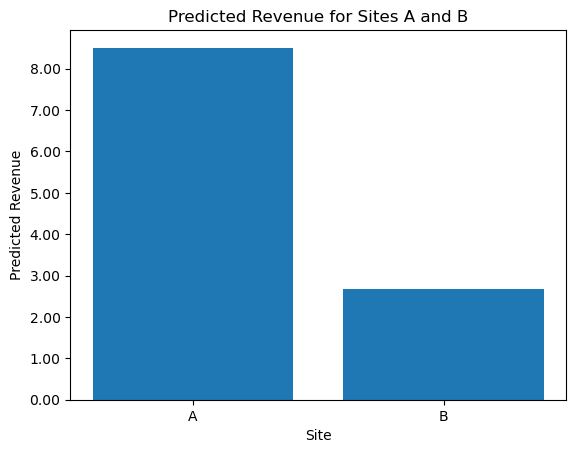

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Coefficients from your regression model
coefficients = {
    'const': 26.0577,
    'MAN': 1.5126,
    'TYP': 1.1021,
    'INCOME': -4.3543,
    'INCOME_SQ': 0.1755
}

# Site characteristics
site_a = {
    'Site': 'A',
    'MAN': 4,
    'TYP': 0,  # Conventional type
    'INCOME': 8,
    'INCOME_SQ': 8**2
}

site_b = {
    'Site': 'B',
    'MAN': 1,
    'TYP': 1,  # Modern or unusual theme/ambience
    'INCOME': 14.8,
    'INCOME_SQ': 14.8**2
}

# Calculate Predicted Revenue for Sites A and B
predicted_revenue_a = (
    coefficients['const'] +
    coefficients['MAN'] * site_a['MAN'] +
    coefficients['TYP'] * site_a['TYP'] +
    coefficients['INCOME'] * site_a['INCOME'] +
    coefficients['INCOME_SQ'] * site_a['INCOME_SQ']
)

predicted_revenue_b = (
    coefficients['const'] +
    coefficients['MAN'] * site_b['MAN'] +
    coefficients['TYP'] * site_b['TYP'] +
    coefficients['INCOME'] * site_b['INCOME'] +
    coefficients['INCOME_SQ'] * site_b['INCOME_SQ']
)

# Create a DataFrame for the results
data = {
    'Site': [site_a['Site'], site_b['Site']],
    'Predicted Revenue': [predicted_revenue_a, predicted_revenue_b]
}

result_df = pd.DataFrame(data)

# Print the table with non-rounded numbers
print("Table:")
print(result_df)

# Plot Predicted Revenue without rounding on the y-axis
plt.bar(result_df['Site'], result_df['Predicted Revenue'])
plt.xlabel('Site')
plt.ylabel('Predicted Revenue')
plt.title('Predicted Revenue for Sites A and B')

# Display non-rounded numbers on the y-axis
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()


In [62]:
# Prediction equation coefficients
const_coeff = 26.0577
man_coeff = 1.5126
typ_coeff = 1.1021
income_coeff = -4.3543
income_sq_coeff = 0.1755

# Site characteristics
MAN_A = 4
MAN_B = 1
TYP_A = 0  # Conventional type
TYP_B = 1  # Modern or unusual theme/ambience
INCOME_A = 8  # Local per capita annual income for Site A in millions
INCOME_B = 14.8  # Local per capita annual income for Site B in millions
INCOME_SQ_A = INCOME_A ** 2
INCOME_SQ_B = INCOME_B ** 2

# Calculate Predicted Revenue for Site A and Site B
predicted_revenue_A = (
    const_coeff +
    man_coeff * MAN_A +
    typ_coeff * TYP_A +
    income_coeff * INCOME_A +
    income_sq_coeff * INCOME_SQ_A
)

predicted_revenue_B = (
    const_coeff +
    man_coeff * MAN_B +
    typ_coeff * TYP_B +
    income_coeff * INCOME_B +
    income_sq_coeff * INCOME_SQ_B
)

# Display the prediction equation
print("Prediction Equation:")
print(f"Predicted Revenue = {const_coeff} + ({man_coeff} * MAN) + ({typ_coeff} * TYP) + ({income_coeff} * INCOME) + ({income_sq_coeff} * INCOME^2)")

# Print the predicted revenues
print("Predicted Revenue for Site A:", predicted_revenue_A)
print("Predicted Revenue for Site B:", predicted_revenue_B)


Prediction Equation:
Predicted Revenue = 26.0577 + (1.5126 * MAN) + (1.1021 * TYP) + (-4.3543 * INCOME) + (0.1755 * INCOME^2)
Predicted Revenue for Site A: 8.505699999999997
Predicted Revenue for Site B: 2.670279999999998


In [65]:
# Standard errors of the coefficients (taken from your regression output)
se_const = 1.906
se_man = 0.030
se_typ = 0.137
se_income = 0.336
se_income_sq = 0.015

# Confidence level (e.g., 95% confidence interval)
confidence_level = 0.95

# Calculate the critical value for the confidence interval
from scipy.stats import t
degrees_of_freedom = len(df) - len(coefficients)  # Adjust for the number of coefficients
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

# Calculate the margin of error for the predictions
margin_of_error_A = (
    t_critical *
    ((se_const ** 2) +
    (se_man ** 2) * MAN +
    (se_typ ** 2) * TYP_A +
    (se_income ** 2) * INCOME_A +
    (se_income_sq ** 2) * INCOME_SQ_A) ** 0.5
)

margin_of_error_B = (
    t_critical *
    ((se_const ** 2) +
    (se_man ** 2) * MAN +
    (se_typ ** 2) * TYP_B +
    (se_income ** 2) * INCOME_B +
    (se_income_sq ** 2) * INCOME_SQ_B) ** 0.5
)

# Calculate the confidence intervals for the predictions
confidence_interval_A = (predicted_revenue_A - margin_of_error_A, predicted_revenue_A + margin_of_error_A)
confidence_interval_B = (predicted_revenue_B - margin_of_error_B, predicted_revenue_B + margin_of_error_B)

# Display the prediction equation
print("Prediction Equation:")
# (Include coefficients as needed)

# Print the predicted revenues with confidence intervals
print("Predicted Revenue for Site A:", predicted_revenue_A)
print(f"{confidence_level*100}% Confidence Interval for Site A:", confidence_interval_A)
print("Predicted Revenue for Site B:", predicted_revenue_B)
print(f"{confidence_level*100}% Confidence Interval for Site B:", confidence_interval_B)


Prediction Equation:
Predicted Revenue for Site A: 8.505699999999997
95.0% Confidence Interval for Site A: (4.200367813052064, 12.81103218694793)
Predicted Revenue for Site B: 2.670279999999998
95.0% Confidence Interval for Site B: (-2.007426946893294, 7.347986946893291)
